In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv'
df = pd.read_csv(url)  

print(df.head())

   True_index  Store_ID  Day_of_week        Date  Nb_customers_on_day  Open  \
0           0       625            3  2013-11-06                  641     1   
1           1       293            2  2013-07-16                  877     1   
2           2        39            4  2014-01-23                  561     1   
3           3       676            4  2013-09-26                 1584     1   
4           4       709            3  2014-01-22                 1477     1   

   Promotion State_holiday  School_holiday  Sales  
0          1             0               0   7293  
1          1             0               1   7060  
2          1             0               0   4565  
3          1             0               0   6380  
4          1             0               0  11647  


In [2]:
# First clean the 'State_holiday' column
df['State_holiday_clean'] = df['State_holiday'].astype(str).str.strip().str.lower()

# Map to binary: 0 = not a holiday, 1 = holiday
df['State_holiday_binary'] = df['State_holiday_clean'].apply(lambda x: 0 if x == '0' or x == 'nan' else 1)

# Combine with School_holiday
df['IsHoliday'] = ((df['State_holiday_binary'] == 1) | (df['School_holiday'] == 1)).astype(int)

In [3]:
df['IsHoliday'].value_counts()

IsHoliday
0    516645
1    124195
Name: count, dtype: int64

In [4]:
unnecessary_cols = ['State_holiday', 'School_holiday', 'State_holiday_clean', 'State_holiday_binary']
df.drop(columns=unnecessary_cols, inplace=True)
df

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,Sales,IsHoliday
0,0,625,3,2013-11-06,641,1,1,7293,0
1,1,293,2,2013-07-16,877,1,1,7060,1
2,2,39,4,2014-01-23,561,1,1,4565,0
3,3,676,4,2013-09-26,1584,1,1,6380,0
4,4,709,3,2014-01-22,1477,1,1,11647,0
...,...,...,...,...,...,...,...,...,...
640835,712040,674,6,2014-09-20,611,1,0,4702,0
640836,712041,1014,4,2015-01-15,1267,1,1,12545,0
640837,712042,135,6,2015-06-20,595,1,0,5823,0
640838,712043,810,1,2014-08-18,599,1,1,7986,1


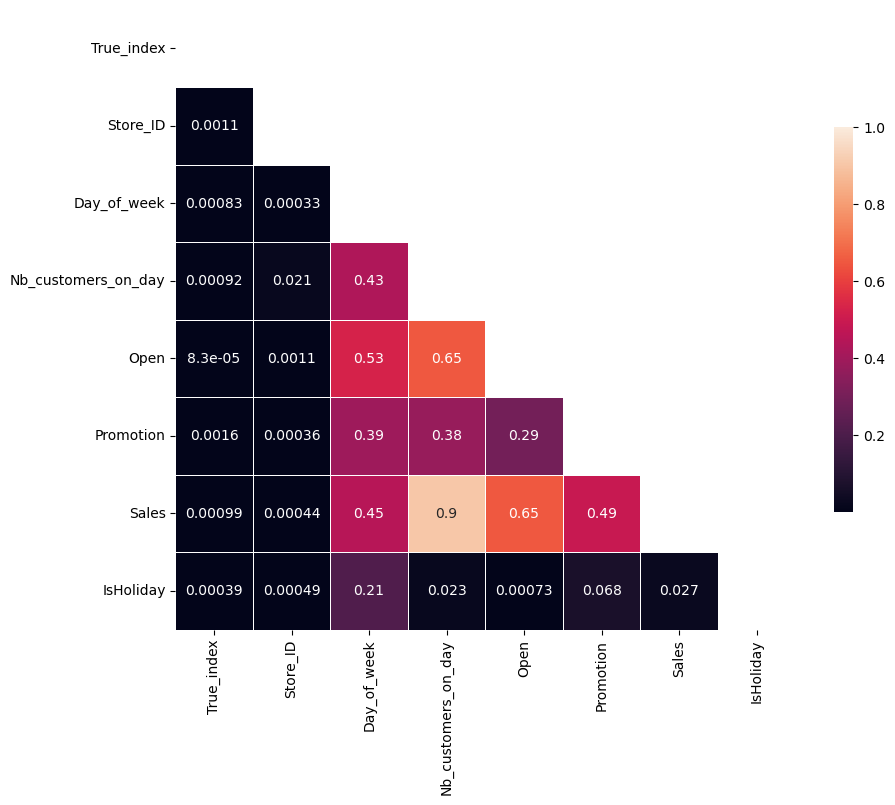

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns first
numeric_df = df.select_dtypes(include='number')

# Then compute the Spearman correlation
corr = np.abs(numeric_df.corr(method="spearman"))

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()

In [5]:
features = df.copy()
features = features.drop(columns='Date')
features['Day_of_week'] = features['Day_of_week'].astype('object')
features = features.drop(['True_index', 'Store_ID'], axis=1)
features = pd.get_dummies(features, drop_first=False)
features

,Nb_customers_on_day,Open,Promotion,Sales,IsHoliday,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7
0,641,1,1,7293,0,False,False,True,False,False,False,False
1,877,1,1,7060,1,False,True,False,False,False,False,False
2,561,1,1,4565,0,False,False,False,True,False,False,False
3,1584,1,1,6380,0,False,False,False,True,False,False,False
4,1477,1,1,11647,0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
640835,611,1,0,4702,0,False,False,False,False,False,True,False
640836,1267,1,1,12545,0,False,False,False,True,False,False,False
640837,595,1,0,5823,0,False,False,False,False,False,True,False
640838,599,1,1,7986,1,True,False,False,False,False,False,False


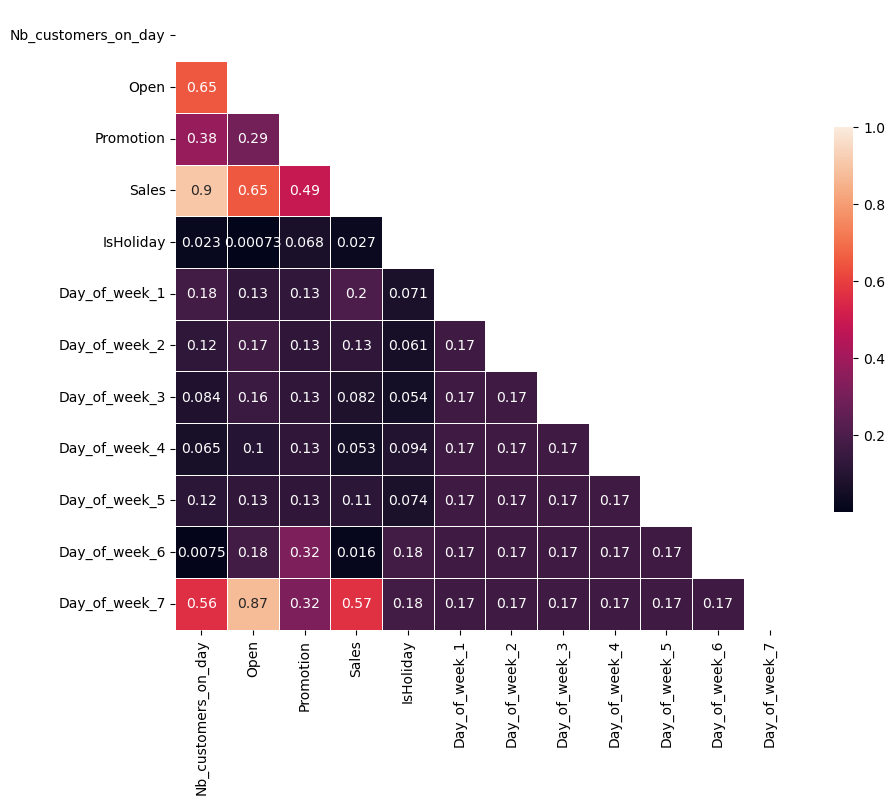

In [70]:

corr = np.abs(features.corr(method="spearman"))

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)
plt.show()